# Corpus callosum's shape signature for segmentation error detection in large datasets

## Abstract

# Workflow

<img src="workflow2.png">

## Introduction

The Corpus Callosum (CC) is the largest white matter structure in the central nervous system that connects both brain hemispheres and allows the communication between them. The CC has great importance in research studies due to the correlation between shape and volume with some subject's characteristics, such as: gender, age, numeric and mathematical skills and handedness~\cite{aboitiz1992fiber}. In addition, some neurodegenerative diseases like Alzheimer, autism, schizophrenia and dyslexia could cause CC shape deformation~\cite{mogali2013shape,hofer2006topography}.

CC segmentation is a necessary step for morphological and physiological features extraction in order to analyze the structure in image-based clinical and research applications. Magnetic Resonance Imaging (MRI) is the most suitable image technique for CC segmentation due to its ability to provide contrast between brain tissues however CC segmentation is challenging because of the shape and intensity variability between subjects, volume partial effect in diffusion MRI, fornex proximity and narrow areas in CC. Among the known MRI modalities, Diffusion-MRI arouses special interest to study the CC, despite its low resolution and high complexity, since it provides useful information related to the organization of brain tissues and the magnetic field does not interfere with the diffusion process itself~\cite{LeBihan2001}.

Some CC segmentation approaches using Diffusion-MRI were found in the literature. Niogi et al.~\citep{niogi2007diffusion} proposed a method based on thresholding, Freitas et al.~\citep{Freitas2011} e Rittner et al.~\citep{Rittner2013} proposed region methods based on Watershed transform, Nazem-Zadeh et al.~\citep{Saksena2012} implemented based on level surfaces, Kong et al.~\citep{Kong2014} presented an clustering algorithm for segmentation and Garcia et al.~\citep{Garcia2011} proposed a hybrid segmentation method based on active geodesic regions and level surfaces.

With the growing of data and automatic algorithms, segmentation over large databases is affordable. Therefore, error automatic detection is important in order to facilitate and speed up filter on CC segmentation bases. ~\citep{mokhtarian1992theory,adamek2004multiscale,jomma2016circle} present proposals about planar objects representation using shape signature for content-based image retrieval (CBIR). In this work, a method for automatic detection of segmentation error in large dataset is proposed based on CC shape signature. Signature is extracted measuring curvature along segmentation contour. Segmentations were obtained implementing two state-of-the-art methods in diffusion: based on Watershed (ref) and ROQS methods. For each segmentation, CC signature is extracted and compared with a mean normal signature. The error between both of these signatures is measured using root mean square error (RMSE). RMSE for normal segmentations is lower than RMSE associated to erroneous segmentation.

# Extraction of signature for segmentation comparation

Signature is a shape descriptor that measures the rate of variation along the segmentation contour\citep{pedrini2008}. The curvature $k$ in the pivot point $p$, with coordinates ($x_p$,$y_p$), is calculated using Eq.~\ref{eq:per1}. This curvature depict the angle between the segments $\overline{(x_{p-ls},y_{p-ls})(x_p,y_p)}$ and $\overline{(x_p,y_p)(x_{p+ls},y_{p+ls})}$. These segments are located to a distance $ls>0$, starting in a pivot point and finishing in anterior and posterior points, respectively.
The signature is obtained calculating the curvature along all segmentation contour.

\begin{equation} \label{eq:per1}
k(x_p,y_p) = \arctan\left(\frac{y_{p+ls}-y_p}{x_{p+ls}-x_p}\right)-\arctan\left(\frac{y_p-y_{p-ls}}{x_p-x_{p-ls}}\right)
\end{equation}

<img src="curvature.png">

Signature construction is done from segmentation contour of the CC. From contour, spline of the contour is obtained. Spline purpose is twofold: to get a smooth version of the contour and to facilitate calculation of the curvature using parametric representation of the spline. Therefore, curvature in the pivot point can be calculated using Eq.~\ref{eq:per1} where $ls$ is the parametric distance between pivot point and any posterior and anterior points and it is associated with the signature resolution. The signature is obtained measuring curvature along spline (Fig.~\ref{fig:per_ex4}). By simplicity, $ls$ is measured in percentage of reconstructed spline points.

In order to achieve quantitative comparation between two signatures root mean square error (RMSE) is introduced. RMSE measures distance, point to point, between signatures $a$ and $b$ (Eq.~\ref{eq:per4}) along all points $p$ of signatures.

\begin{equation} \label{eq:per4}
RMSE = \sqrt{\frac{1}{P}\sum_{p=1}^{P}(k_{ap}-k_{bp})^2}
\end{equation}

Frecuently, signatures of different segmentations are not fitted in the 'x' axis because of the initial point of the spline starts in different positions along the two segmentations. This makes impossible to compare directly the two signatures and before a fitting process must be accomplished. The fitting process is done shifting a signature while the other is kept fixed. For each shift, RMSE between the two signatures is measured. The minor error is the fitting point. After fitting, RMSE between signatures can be measured in order to achieve final quantitative comparation.

## Resolution setting in signature for segmentation error detection

Because of the signature can be used in any resolution, $ls$ must be chosen for achieve segmentation error detection. The optimal resolution must be able to return the greatest RMSE difference between correct and erroneous segmentation when compared with a "normal" signature. Therefore, the "normal" signature is obtained calculating a mean over 20 signatures from correct segmentations for each resolution. The optimal resolution is found comparing the RMSE for 10 correct segmentations and 10 erroneous segmentations.

# Metodology

In this work, comparation of signatures through RMSE is used for segmentation error detection in large datasets. For this, it will be calculated a mean normal signature based on a 20 normal segmentation signatures. This mean normal signature represents a standard correct segmentation. For a new segmentation, signature is extracted. In case of normal segmentation, its signature has lower RMSE when compared with erroneous segmentation.

For experiments, DWI from 145 subjects at the University of Campinas, were acquired on a Philips scanner Achieva 3T in the axial plane with a $1$x$1mm$ spatial resolution and $2mm$ slice thickness, along $32$ directions ($b-value=1000s/mm^2$, $TR=8.5s$, and $TE=61ms$). All data used in this experiment was acquired through a project approved by the research ethics committee from the School of Medicine at UNICAMP. From each acquired DWI volume, only the midsaggital slice was used. Two segmentation methods were implemented to obtained binary planar masks. All the 290 masks were divided on: 20 correct segmentations used for creating the mean signature, 10 correct segmentations and 10 erroneous segmentations used for resolution setting and the remaining 250 segmentation masks used for testing the method. Experiments were performed on the Jupyter, directly on Python.

## Extraction of signature

In [1]:
import numpy as np
import homewilliam as FW
import matplotlib.pyplot as plt
%matplotlib inline

From the database, 20 correct segmentations were chosen. Spline for each one was obtained from segmentation contour. The contour was obtained using mathematical morphology, applying xor logical operation, pixel-wise, between original segmentation and the eroded version of itself by an structuring element b:

\begin{equation} \label{eq:per2}
G_E = XOR(S,S \ominus b)
\end{equation}

From contour, it is calculated spline. The implementation, is a B-spline (basic spline of Boor)~\citep{de1978practical}. This formulation has two parameters: degree, representing polinomial degrees of the spline, and smoothness, being the tradeoff between proximity and smoothness in the fitness of the spline. Degree was fixed in 5 allowing adequate representation of the contour. Smoothness was fixed in 700. This value is based on the mean quantity of pixels of the contour that are passed for spline calculation.

(20, 50, 500)


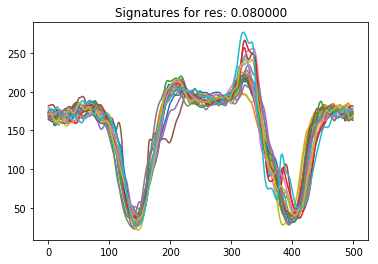

In [2]:
list_mask = [0,2,3,4,5,8,9,10,13,14,15,16,17,18,19,21,22,24,25,26] #Normal masks for mean signature
n_list = len(list_mask)
s = 500 #Smoothness
resols = np.arange(0.01,0.5,0.01) #Signature resolutions
resols = np.insert(resols,0,0.35) #Insert resolution for signature fitting
res = 500 #Points of Spline reconstruction

refer_wat = np.empty((n_list,resols.shape[0],res)) #Initializing signature vector

for mask in xrange(n_list):
    mask_p = np.load('Seg_Watershed/mask_wate_{}.npy'.format(list_mask[mask]))
    pp = FW.get_spline(mask_p,s)

    refer_temp = np.array([]).reshape(0,res) #Initializing temporal signature vector
    for resol in resols:
        refer_temp = np.vstack((refer_temp, FW.get_profile(pp, n_samples=res, radius=resol)))
        
    refer_wat[mask] = refer_temp
    if mask > 0: #Fitting curves using the first one as basis
        dif_curv = []
        prof_ref = refer_wat[0]
        for shift in range(res):
            dif_curv.append(np.abs(np.sum((prof_ref[0] - np.roll(refer_temp[0],shift))**2)))
        refer_wat[mask] = np.apply_along_axis(np.roll, 1, refer_temp, np.argmin(dif_curv))
    
print refer_wat.shape

res_ex = 8
plt.figure()
plt.plot(refer_wat[:,res_ex,:].T)
plt.title("Signatures for res: %f"%(resols[res_ex]))
plt.show()

Mean signature per resolution is generated using all the 20 normal signatures

(50, 500)


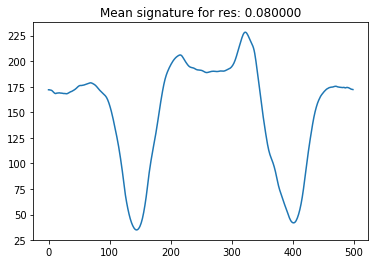

In [3]:
refer_wat_mean = np.mean(refer_wat,axis=0) #Finding mean signature per resolution

print refer_wat_mean.shape
res_ex = 8
plt.figure()
plt.plot(refer_wat_mean[res_ex,:].T)
plt.title("Mean signature for res: %f"%(resols[res_ex]))
plt.show()

It is necessary to find resolution in that diference between RMSE for normal signature and RMSE for erroneous signature is maximum.

In [4]:
list_normal_mask = [27,29,30,31,36,37,38,39,41,42] #Testing normal masks
list_error_mask = [1,7,11,20,28,32,34,35,48,64] #Testing error masks
n_list = np.amax((len(list_normal_mask),len(list_error_mask)))
refer_wat_n = np.empty((n_list,resols.shape[0],res)) #Initializing normal signature vector
refer_wat_e = np.empty((n_list,resols.shape[0],res)) #Initializing error signature vector

for mask in xrange(n_list):
    mask_pn = np.load('Seg_Watershed/mask_wate_{}.npy'.format(list_normal_mask[mask]))
    ppn = FW.get_spline(mask_pn,s)
    mask_pe = np.load('Seg_Watershed/mask_wate_{}.npy'.format(list_error_mask[mask]))
    ppe = FW.get_spline(mask_pe,s)

    refer_temp_n = np.array([]).reshape(0,res) #Initializing temporal normal signature vector
    refer_temp_e = np.array([]).reshape(0,res) #Initializing temporal error signature vector
    for resol in resols:
        refer_temp_n = np.vstack((refer_temp_n, FW.get_profile(ppn, n_samples=res, radius=resol)))
        refer_temp_e = np.vstack((refer_temp_e, FW.get_profile(ppe, n_samples=res, radius=resol)))
        
    refer_wat_n[mask] = refer_temp_n
    refer_wat_e[mask] = refer_temp_e
    if mask > 0: #Fitting curves using the first one as basis
        dif_curv_n = []
        prof_ref_n = refer_wat_n[0]
        dif_curv_e = []
        prof_ref_e = refer_wat_e[0]
        for shift in range(res):
            dif_curv_n.append(np.abs(np.sum((prof_ref_n[0] - np.roll(refer_temp_n[0],shift))**2)))
            dif_curv_e.append(np.abs(np.sum((prof_ref_e[0] - np.roll(refer_temp_e[0],shift))**2)))
        refer_wat_n[mask] = np.apply_along_axis(np.roll, 1, refer_temp_n, np.argmin(dif_curv_n))
        refer_wat_e[mask] = np.apply_along_axis(np.roll, 1, refer_temp_e, np.argmin(dif_curv_e))
           
print refer_wat_n.shape
print refer_wat_e.shape

(10, 50, 500)
(10, 50, 500)


Now, we'll compare mean signature with error and normal signatures in all resolutions

(10, 50)
(50,)
(10, 50)


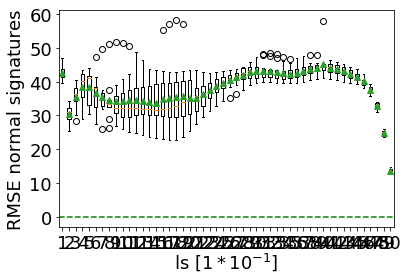

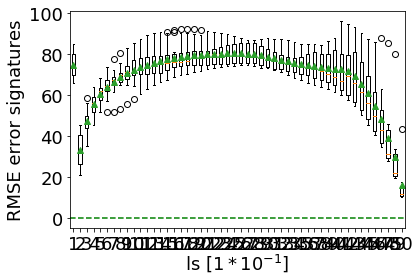

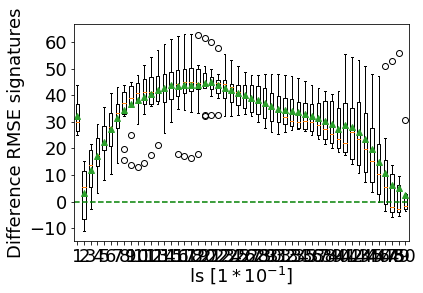

In [5]:
rmse_nacum = np.array([]).reshape(0,resols.shape[0])
rmse_eacum = np.array([]).reshape(0,resols.shape[0])

for sample in xrange(refer_wat_n.shape[0]):
    RMSE_n = np.sqrt(np.sum((refer_wat_mean - refer_wat_n[sample])**2,axis=1)/(refer_wat_mean.shape[1]))
    rmse_nacum = np.vstack((rmse_nacum, RMSE_n))
    RMSE_e = np.sqrt(np.sum((refer_wat_mean - refer_wat_e[sample])**2,axis=1)/(refer_wat_mean.shape[1]))
    rmse_eacum = np.vstack((rmse_eacum, RMSE_e))

print rmse_nacum.shape
print RMSE_e.shape
    
dif_dis = rmse_eacum - rmse_nacum
print rmse_eacum.shape
    
figpr = plt.figure()
plt.boxplot(rmse_nacum, showmeans=True)#, labels=radios)
plt.axhline(y=0, color='g', linestyle='--')
plt.xlabel('ls [$1*10^{-1}$]', fontsize = 18, labelpad=-2)
plt.ylabel('RMSE normal signatures', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#plt.xticks(np.arange(min(radios), max(radios)*2.5, 4))
plt.show()

figpr = plt.figure()
plt.boxplot(rmse_eacum, showmeans=True)#, labels=radios)
plt.axhline(y=0, color='g', linestyle='--')
plt.xlabel('ls [$1*10^{-1}$]', fontsize = 18, labelpad=-2)
plt.ylabel('RMSE error signatures', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#plt.xticks(np.arange(min(radios), max(radios)*2.5, 4))
plt.show()

figpr = plt.figure()
plt.boxplot(dif_dis, showmeans=True)#, labels=radios)
plt.axhline(y=0, color='g', linestyle='--')
plt.xlabel('ls [$1*10^{-1}$]', fontsize = 18, labelpad=-2)
plt.ylabel('Difference RMSE signatures', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#plt.xticks(np.arange(min(radios), max(radios)*2.5, 4))
plt.show()

# References